# Function Description
## 1
Fisher's exact test is a statistical significance test used for analyzing contingency tables, particularly when sample sizes are small. It is unlike other tests in that it calculates the exact probability of observing a table as extreme or more extreme than the one observed, under the null hypothesis of independence. This is different from a chi-square test for example, which relies on approximations. The equation below represents how the test is performed and how it compares each variable to eachother. 

$$P = \binom{a+b}{a}\binom{c+d}{c}/\binom{n}{a+c} = \frac{(a+b)!(c+d)!(a+c)!(b+d)!}{n!a!b!c!d!}$$

## 2

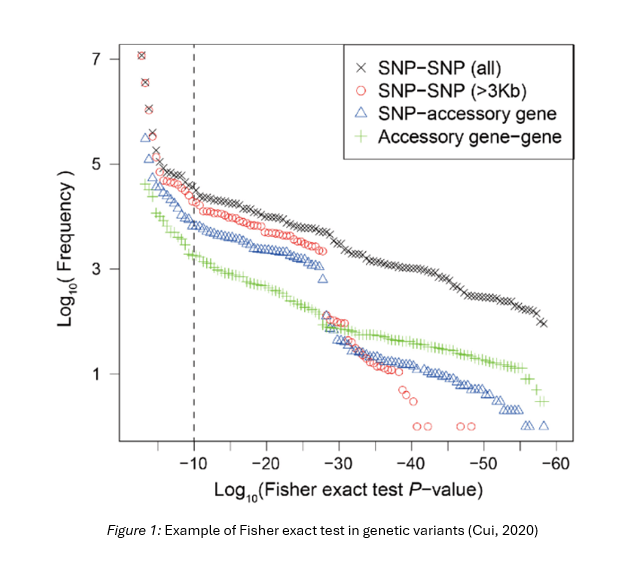

In [4]:
def fisher_exact(table):
    '''
    Performs Fisher's exact test for a 2x2 contingency table.
    
    Parameters:
    table : array-like
        A 2x2 contingency table in the form of a list of lists or numpy array
        [[a, b], [c, d]] where:
        a = number of successes in group 1
        b = number of successes in group 2
        c = number of failures in group 1
        d = number of failures in group 2
    
    Returns:
    p_value : float
        The p-value from Fisher's exact test
    
    Example:
    >>> table = [[8, 2], [1, 5]]  # Treatment vs. Control recovery data
    >>> p_value = fisher_exact(table)
    >>> print(p_value)
    0.0350877192982456
    
    Notes:
    This function calculates the exact probability of observing the given table
    or one more extreme under the null hypothesis of independence.
    It is particularly useful for small sample sizes where chi-square 
    approximations may not be valid.
    '''
    import numpy as np
    from scipy import stats
    
    # Convert input to numpy array if it's not already
    table = np.array(table, dtype=np.int64)
    
    # Check if the table is 2x2
    if table.shape != (2, 2):
        raise ValueError("Fisher's exact test requires a 2x2 contingency table")
    
    # Perform Fisher's exact test using SciPy
    odds_ratio, p_value = stats.fisher_exact(table)
    
    return p_value

Contingency Table:
                Treatment  Control
Recovered         14        4
Not Recovered     6        16

Results of Fisher's Exact Test:
p-value: 0.0036
Interpretation: Statistically significant at α=0.05
Conclusion: Reject the null hypothesis


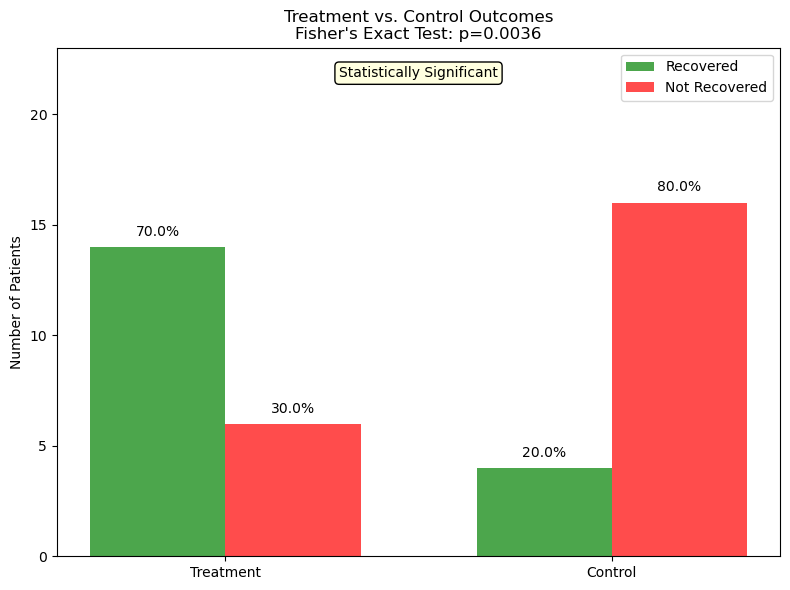

In [8]:
# Example: Using Fisher's Exact Test on simulated data

import numpy as np
import matplotlib.pyplot as plt
#from BIOM480Tests import fisher_exact

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data for a small clinical trial
# Let's consider a study comparing a new drug treatment versus standard treatment
# for a rare disease with a small sample size

# Scenario: Simulating patient outcomes (recovery vs. no recovery)
# for treatment and control groups

# Generate random data with some built-in association
n_treatment = 20
n_control = 20

# Simulation with stronger effect for treatment group
treatment_recovery_rate = 0.70  # 70% recovery in treatment group
control_recovery_rate = 0.30    # 30% recovery in control group

# Generate outcomes (1 = recovered, 0 = not recovered)
treatment_outcomes = np.random.binomial(1, treatment_recovery_rate, n_treatment)
control_outcomes = np.random.binomial(1, control_recovery_rate, n_control)

# Count results
treatment_recovered = np.sum(treatment_outcomes)
treatment_not_recovered = n_treatment - treatment_recovered
control_recovered = np.sum(control_outcomes)
control_not_recovered = n_control - control_recovered

# Create the 2x2 contingency table
contingency_table = [
    [treatment_recovered, control_recovered],
    [treatment_not_recovered, control_not_recovered]
]

print("Contingency Table:")
print(f"                Treatment  Control")
print(f"Recovered         {treatment_recovered}        {control_recovered}")
print(f"Not Recovered     {treatment_not_recovered}        {control_not_recovered}")

# Perform Fisher's exact test
p_value = fisher_exact(contingency_table)

print(f"\nResults of Fisher's Exact Test:")
print(f"p-value: {p_value:.4f}")
print(f"Interpretation: {'Statistically significant' if p_value < 0.05 else 'Not statistically significant'} at α=0.05")
print(f"Conclusion: {'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis")

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))

# Create grouped bar chart
labels = ['Treatment', 'Control']
recovered = [treatment_recovered, control_recovered]
not_recovered = [treatment_not_recovered, control_not_recovered]

x = np.arange(len(labels))
width = 0.35

ax.bar(x - width/2, recovered, width, label='Recovered', color='green', alpha=0.7)
ax.bar(x + width/2, not_recovered, width, label='Not Recovered', color='red', alpha=0.7)

# Add percentages on top of bars
for i, v in enumerate(recovered):
    ax.text(i - width/2, v + 0.5, f"{v/n_treatment*100:.1f}%", ha='center')
    
for i, v in enumerate(not_recovered):
    ax.text(i + width/2, v + 0.5, f"{v/n_control*100:.1f}%", ha='center')

# Add other chart elements
ax.set_title(f"Treatment vs. Control Outcomes\nFisher's Exact Test: p={p_value:.4f}")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Patients')
ax.set_ylim(0, max(n_treatment, n_control) + 3)
ax.legend()

# Add annotation with test result
significance_text = "Statistically Significant" if p_value < 0.05 else "Not Statistically Significant"
ax.annotate(significance_text, 
            xy=(0.5, 0.95), 
            xycoords='axes fraction',
            ha='center', 
            va='center',
            bbox=dict(boxstyle="round,pad=0.3", 
                      fc='lightyellow', 
                      ec="black", 
                      lw=1))

plt.tight_layout()
plt.show()